<a href="https://colab.research.google.com/github/manepriyanka321/Deep-learning/blob/main/Image_Classification_with_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image classification with CNN (Convulation Neural Network)

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

# Step 1 : Load image dataset from keras

In [2]:
from keras.datasets import mnist
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
xtrain

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [4]:
xtrain.shape

(60000, 28, 28)

In [5]:
ytrain[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [6]:
xtest

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [7]:
xtest.shape

(10000, 28, 28)

In [8]:
ytest[0:5]

array([7, 2, 1, 0, 4], dtype=uint8)

# Visualizing handwriting digits from data

In [9]:
xtrain[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

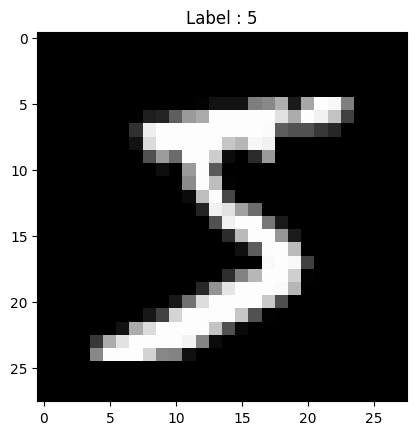

In [11]:
plt.imshow(xtrain[0], cmap="gray")
plt.title(f"Label : {ytrain[0]}")
plt.show()

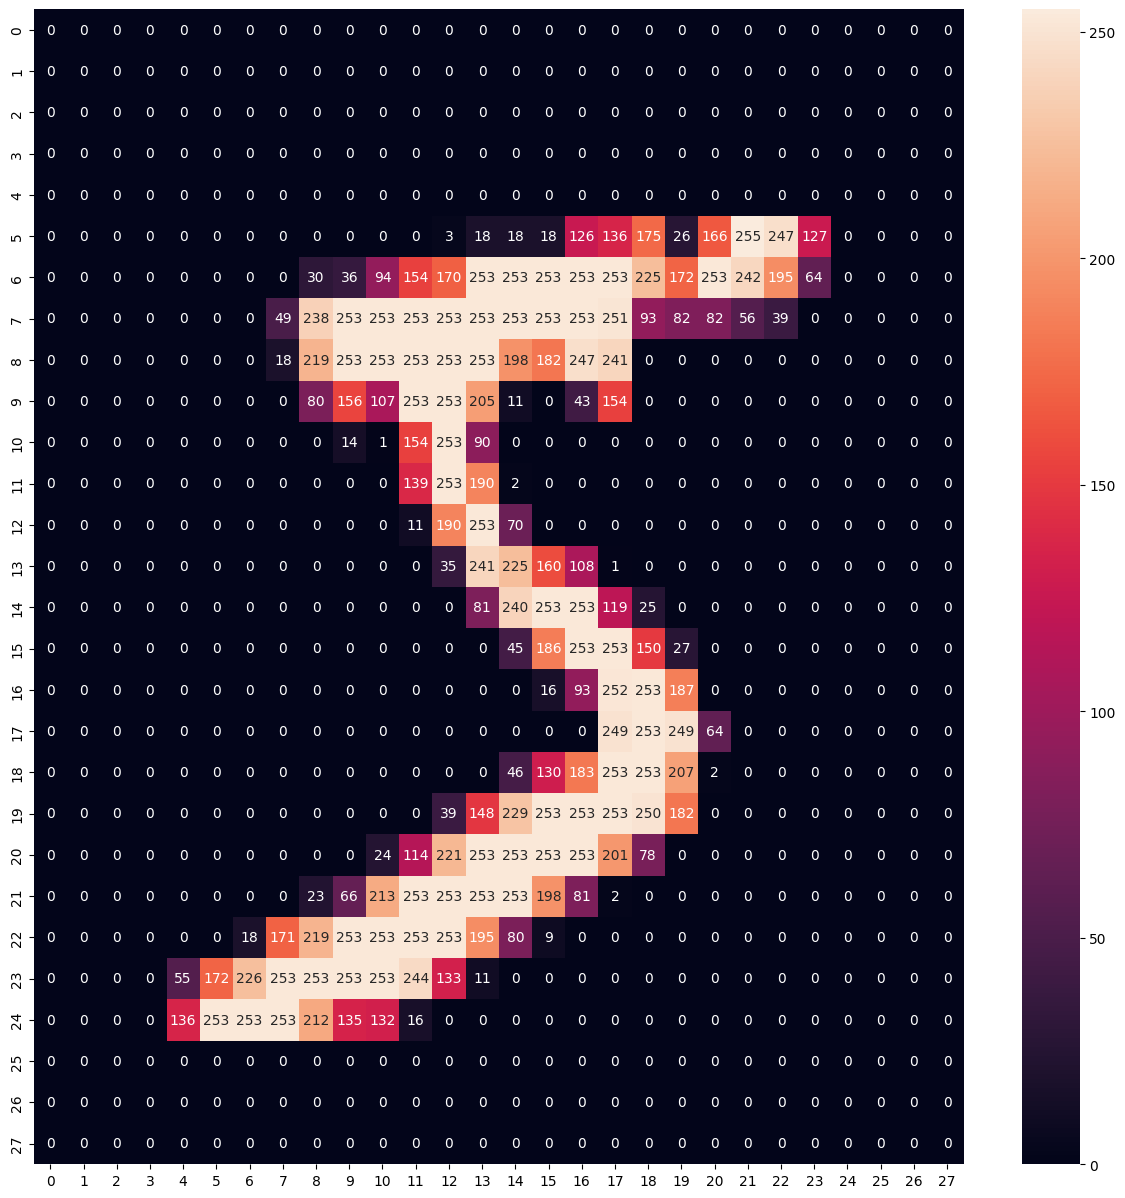

In [12]:
plt.figure(figsize=(15,15))
sns.heatmap(xtrain[0], annot=True, fmt = "d")
plt.show()

# Visualize first 9 images from train data

In [13]:
list(range(9))

[0, 1, 2, 3, 4, 5, 6, 7, 8]

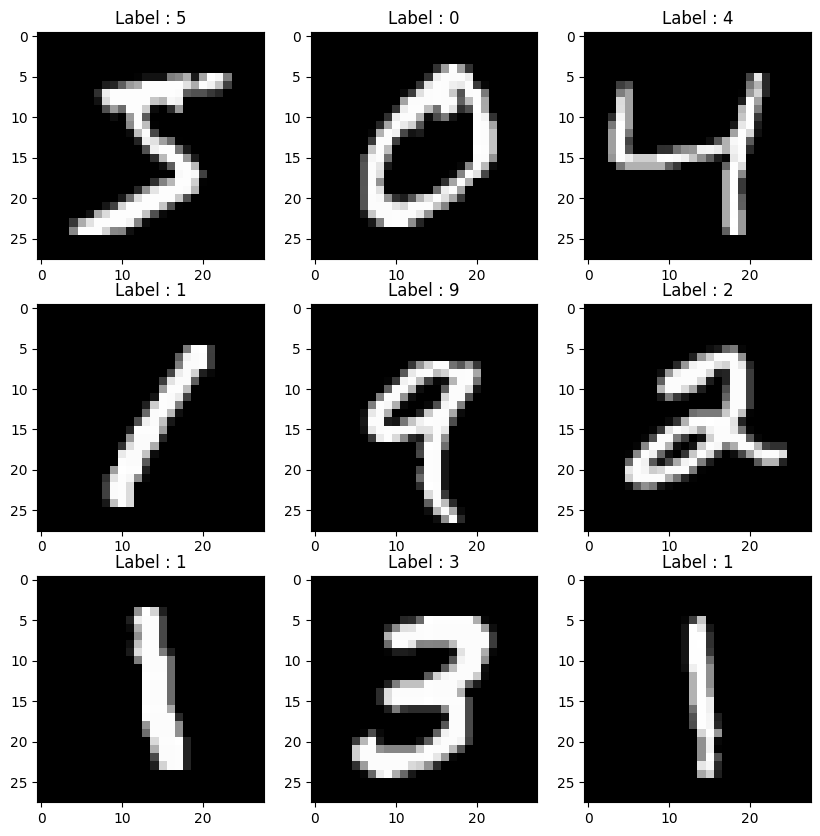

In [15]:
plt.figure(figsize=(10, 10))
for i in range(9):
  plt.subplot(3, 3, i+1)
  plt.imshow(xtrain[i], cmap="gray")
  plt.title(f"Label : {ytrain[i]}")

# Preprocessing on data

In [16]:
import numpy as np

In [17]:
np.unique(ytrain)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [18]:
xtrain_scl = xtrain.astype("float32")/255
xtest_scl = xtest.astype("float32")/255

In [19]:
xtrain_scl[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

# Because above is multiclass classification problem you need to one hot encode y data

In [20]:
import numpy as np

In [21]:
# Make sure the image shape is (28, 28, 1)
xtrain_scl = np.expand_dims(xtrain_scl, -1)
xtest_scl = np.expand_dims(xtest_scl, -1)

In [22]:
from keras.utils import to_categorical

In [23]:
ytrain_cat = to_categorical(ytrain)
ytest_cat = to_categorical(ytest)

In [24]:
ytrain[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [25]:
ytrain_cat[0:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

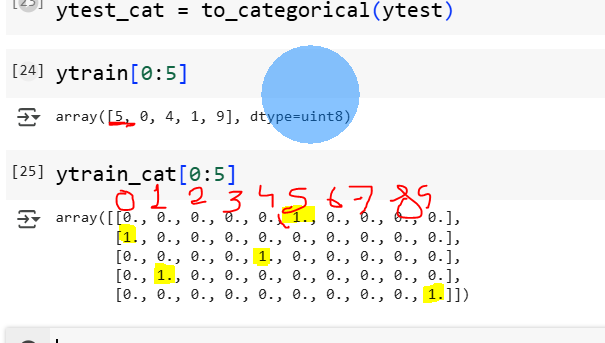

# Build the neural network

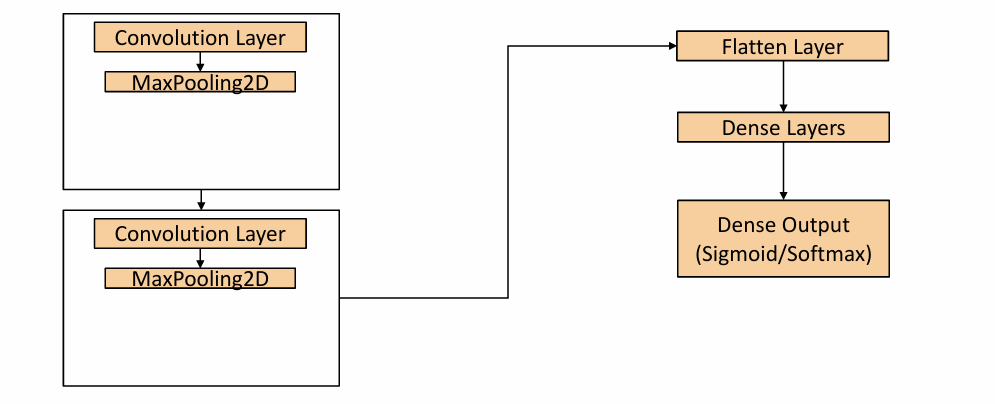

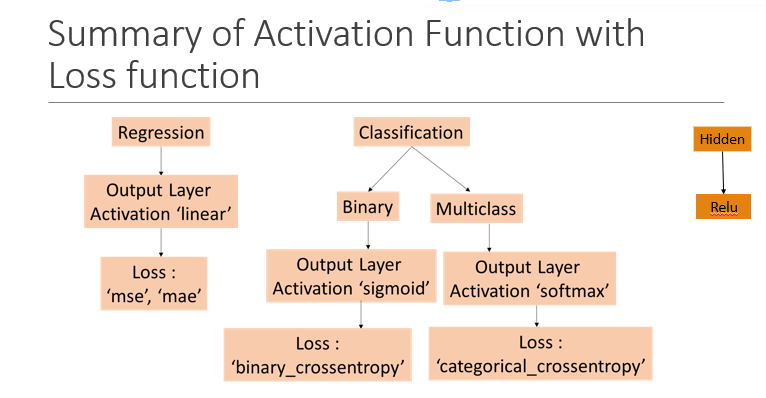

In [26]:
xtrain.shape

(60000, 28, 28)

In [27]:
ytrain_cat.shape

(60000, 10)

In [29]:
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout, Convolution2D, MaxPooling2D, Flatten

In [30]:
model = Sequential(
    [
        Input(shape=(28, 28, 1)),
        Convolution2D(32, kernel_size=(3, 3), activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        Convolution2D(64, kernel_size=(3, 3), activation="relu"),
        MaxPooling2D(pool_size=(2,2)),
        Flatten(),
        Dropout(0.5),
        Dense(10, activation="softmax")
    ]
)

In [31]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │          16,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [33]:
hist = model.fit(xtrain_scl, ytrain_cat, validation_split=0.1, epochs=10, batch_size=32)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.8511 - loss: 0.4749 - val_accuracy: 0.9828 - val_loss: 0.0649
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9709 - loss: 0.0898 - val_accuracy: 0.9872 - val_loss: 0.0461
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9794 - loss: 0.0652 - val_accuracy: 0.9895 - val_loss: 0.0376
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9820 - loss: 0.0562 - val_accuracy: 0.9898 - val_loss: 0.0373
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9840 - loss: 0.0523 - val_accuracy: 0.9915 - val_loss: 0.0342
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9857 - loss: 0.0445 - val_accuracy: 0.9907 - val_loss: 0.0323
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9872 - loss: 0.0409 - val_accuracy: 0.9912 - val_loss: 0.0333
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9880 - loss: 0.0370

# Plot the learning curve

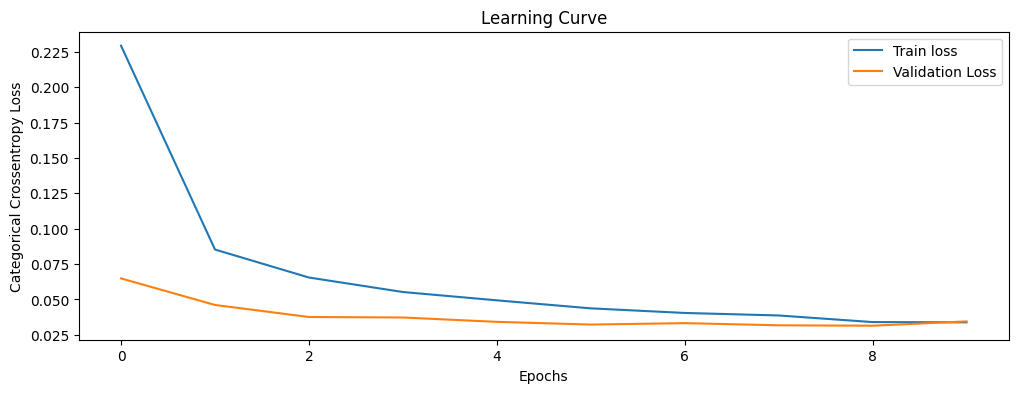

In [35]:
plt .figure(figsize=(12, 4))
plt.plot(hist.history["loss"], label = "Train loss")
plt.plot(hist.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Categorical Crossentropy Loss")
plt.title("Learning Curve")
plt.legend()
plt.show()

# Model Evaluation

In [36]:
model.evaluate(xtrain_scl, ytrain_cat)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9949 - loss: 0.0156


[0.01743713766336441, 0.9944000244140625]

In [37]:
model.evaluate(xtest_scl, ytest_cat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9899 - loss: 0.0316


[0.025825150310993195, 0.9922999739646912]

In [38]:
yprob_train = model.predict(xtrain_scl)
yprob_train[0:5]

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


array([[1.5989389e-10, 4.6247641e-12, 1.2672414e-09, 9.0013444e-03,
        3.2732805e-12, 9.9093962e-01, 6.9996470e-12, 5.3826138e-08,
        5.3781474e-05, 5.2870441e-06],
       [9.9999797e-01, 3.8565898e-14, 6.1513555e-07, 5.9537542e-10,
        2.9281463e-11, 2.0456488e-08, 3.2430177e-07, 1.2686407e-10,
        5.9453998e-07, 5.2834207e-07],
       [1.5963886e-14, 7.6948290e-08, 2.7819167e-08, 6.9213280e-10,
        9.9999666e-01, 2.3510465e-08, 6.1893782e-11, 1.6868979e-06,
        1.5138758e-08, 1.5658121e-06],
       [2.8973371e-08, 9.9993622e-01, 3.0431875e-06, 3.8639745e-09,
        2.2070315e-05, 2.2205928e-08, 4.3324223e-07, 2.2265889e-05,
        1.5749478e-05, 1.7475463e-07],
       [4.7122319e-12, 1.4635527e-09, 1.7207485e-08, 1.7683281e-08,
        1.8226505e-04, 1.6434065e-08, 4.1662127e-13, 3.5338155e-06,
        4.9964587e-05, 9.9976414e-01]], dtype=float32)

In [39]:
ypred_train = np.argmax(yprob_train, axis =1)

In [41]:
ypred_train[0:5]

array([5, 0, 4, 1, 9])

In [42]:
ytrain[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [43]:
yprob_test = model.predict(xtest_scl)
ypred_test = np.argmax(yprob_test, axis=1)
ypred_test[0:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([7, 2, 1, 0, 4])

In [44]:
ytest[0:5]

array([7, 2, 1, 0, 4], dtype=uint8)

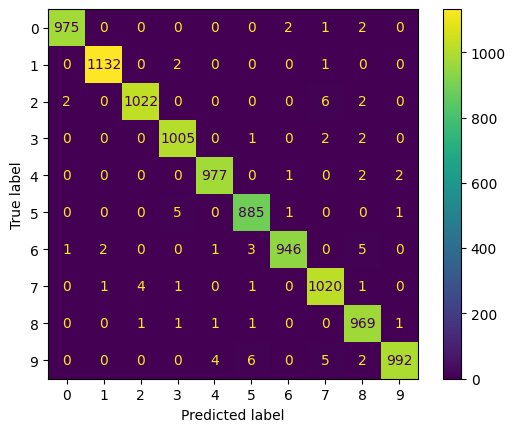

In [45]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(ytest, ypred_test)

In [47]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       980
           1       1.00      1.00      1.00      1135
           2       1.00      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.98      0.99      0.99       974
           9       1.00      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



# From above results the model is good model because f1_macro>0.8

# Save the model

In [48]:
model.save("digit_model.keras")

# Load the model

In [49]:
from keras.models import load_model
m = load_model("/content/digit_model.keras")
m.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │          16,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 104,480 (408.13 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 69,654 (272.09 KB)

# Out of sample training

In [50]:
import cv2

In [55]:
img = cv2.imread("/content/img7.png", cv2.IMREAD_GRAYSCALE)
img

array([[250, 212, 207, 203, 203, 200, 204, 214, 251, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [232,  36,  15,  50,  51,  53,  21,  37, 237, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [231,  16,   0,  49,  52, 122,  30,  14, 236, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [232,  24,   0,   5,  57,  89,   4,  27, 237, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [232,  24,   0,  10,  89,  18,   0,  29, 237, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [232,  24,   0,  48,  67,   0,   0,  29, 237, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [232,  24,   0,  65,  26,   0,   0,  29, 237, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [231,  18,   0,  55,   6,   0,   0,  23, 236, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [232,  33,  11,  23,  13,  11,  11,  36, 237, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [249, 194, 186, 184, 187, 188, 186, 195, 250, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 25

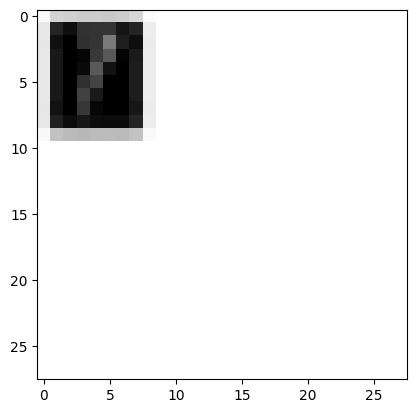

In [56]:
plt.imshow(img, cmap="gray")
plt.show()

In [58]:
img_scl = img.astype("float32")/255


In [59]:
img_scl = img_scl.reshape(1, 28, 28, 1)

In [60]:
img_scl

array([[[[0.98039216],
         [0.83137256],
         [0.8117647 ],
         [0.79607844],
         [0.79607844],
         [0.78431374],
         [0.8       ],
         [0.8392157 ],
         [0.9843137 ],
         [1.        ],
         [1.        ],
         [1.        ],
         [1.        ],
         [1.        ],
         [1.        ],
         [1.        ],
         [1.        ],
         [1.        ],
         [1.        ],
         [1.        ],
         [1.        ],
         [1.        ],
         [1.        ],
         [1.        ],
         [1.        ],
         [1.        ],
         [1.        ],
         [1.        ]],

        [[0.9098039 ],
         [0.14117648],
         [0.05882353],
         [0.19607843],
         [0.2       ],
         [0.20784314],
         [0.08235294],
         [0.14509805],
         [0.92941177],
         [1.        ],
         [1.        ],
         [1.        ],
         [1.        ],
         [1.        ],
         [1.        ],
         

In [61]:
prob = model.predict(img_scl)
prob

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 955ms/step


array([[1.3678592e-02, 8.7469565e-03, 1.9560570e-02, 1.2869914e-02,
        8.3360985e-02, 8.8704471e-03, 3.6104850e-02, 7.3614693e-01,
        8.0433875e-02, 2.2682923e-04]], dtype=float32)

In [62]:
np.max(prob)

0.7361469

In [65]:
pred = np.argmax(prob, axis=1)

In [66]:
pred

array([7])

In [67]:
def predict_digit(model, img_path):
  img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
  plt.imshow(img, cmap="gray")
  plt.show()
  img_scl = img.astype("float32")/255
  img_scl = img.reshape(1, 28, 28, 1)
  prob = model.predict(img_scl)
  pred = np.argmax(prob, axis=1)
  max_prob = np.max(prob, axis=1)
  return pred, max_prob


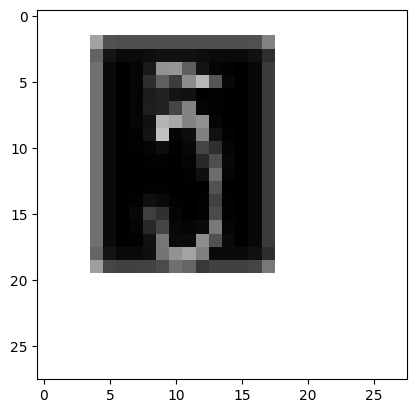

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 592ms/step


(array([2]), array([1.], dtype=float32))

In [68]:
predict_digit(model, "/content/img5.png")

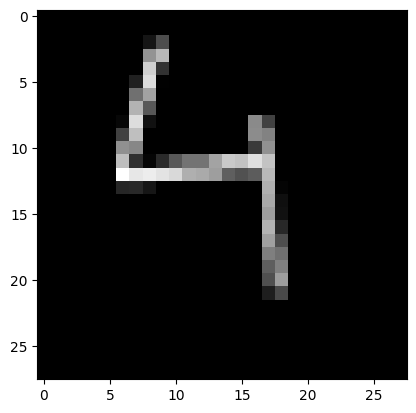

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


(array([4]), array([1.], dtype=float32))

In [69]:
predict_digit(model, "/content/img4.png")